In [11]:
import pandas as pd
import prophet as Prophet
from prophet import Prophet


In [6]:
df= pd.read_csv('/content/Final_Dataset.csv')

In [7]:
df = df[['DATE', 'CPI']]

In [13]:
df_prophet = df.rename(columns={'DATE': 'ds', 'CPI': 'y'})


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoqis1mad/4mdxt6sw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoqis1mad/xyh62l03.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73679', 'data', 'file=/tmp/tmpoqis1mad/4mdxt6sw.json', 'init=/tmp/tmpoqis1mad/xyh62l03.json', 'output', 'file=/tmp/tmpoqis1mad/prophet_model8g5y9yxd/prophet_model-20231206034043.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:40:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:40:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


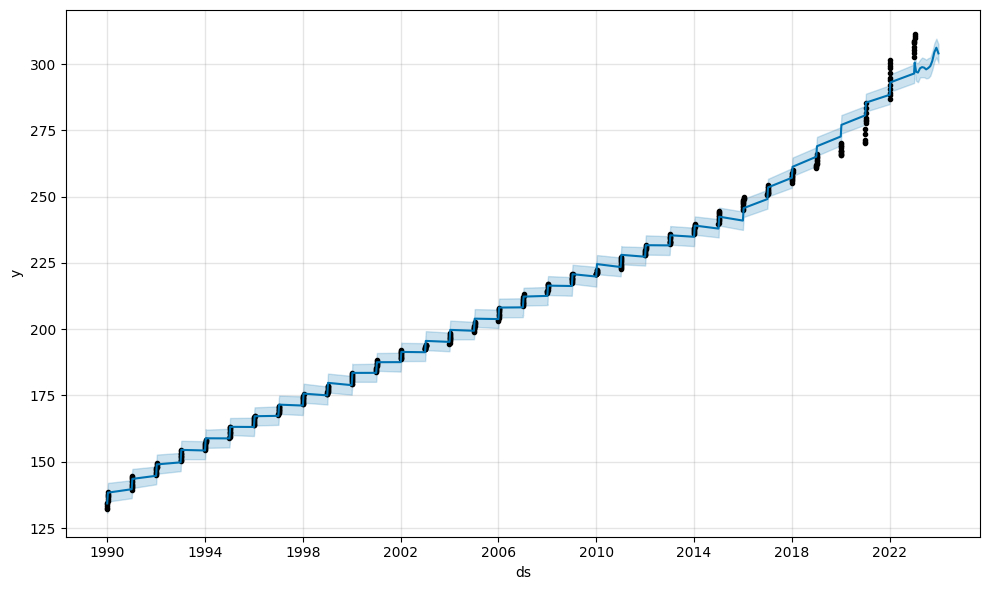

In [14]:
# Initialize the Prophet model
model = Prophet()
# Fit the model to the data
model.fit(df_prophet)

# Create a DataFrame with future dates for forecasting
future = model.make_future_dataframe(periods=12, freq='M')  # Adjust 'periods' as needed

# Generate forecasts
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)

# Show the plot
fig.show()

In [17]:


# Create a DataFrame with future dates for forecasting
future = model.make_future_dataframe(periods=12, freq='M')  # Adjust 'periods' as needed

# Generate forecasts
forecast = model.predict(future)

# Display the model summary
model_summary = model.stan_backend.stan_fit
print(model_summary)


CmdStanMLE: model=prophet_model['method=optimize', 'algorithm=lbfgs', 'iter=10000']
 csv_file:
	/tmp/tmpoqis1mad/prophet_model8g5y9yxd/prophet_model-20231206034043.csv
 output_file:
	/tmp/tmpoqis1mad/prophet_model8g5y9yxd/prophet_model-20231206034043_0-stdout.txt


In [16]:

# Display the table of future predictions
future_predictions = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
print(future_predictions)


            ds        yhat  yhat_lower  yhat_upper
0   1990-01-01  134.281005  130.714452  137.645536
1   1990-01-02  134.717863  131.278016  138.184799
2   1990-01-03  134.900059  131.521875  138.370013
3   1990-01-04  135.267542  131.600311  138.612129
4   1990-01-05  135.606922  132.050061  138.895638
..         ...         ...         ...         ...
413 2023-08-31  299.216293  295.586627  302.349630
414 2023-09-30  301.144329  297.361960  304.718054
415 2023-10-31  304.483250  301.281143  308.103045
416 2023-11-30  306.174725  302.815911  309.437797
417 2023-12-31  304.024204  300.667797  307.411325

[418 rows x 4 columns]
